In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
np.random.seed(55)

In [62]:
# generate dataset
n=100
x=np.linspace(-5,5,n)
noise=np.random.normal(0,2,n)
y_model=12*np.sin(x)+0.5*(x**2)+2*x+5
y=y_model+noise

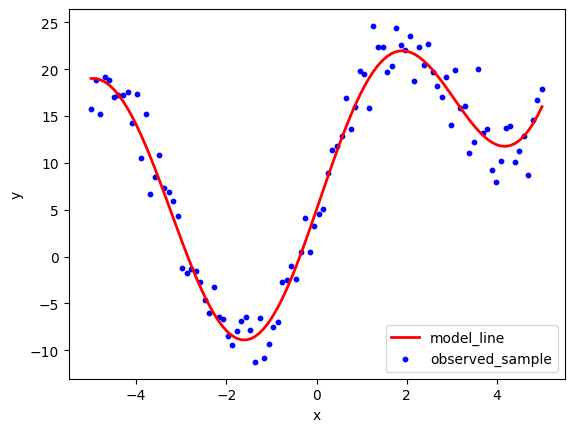

In [63]:
plt.plot(x,y_model,color='red',lw=2,label='model_line')
plt.scatter(x,y,color='blue',s=10,label='observed_sample')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [65]:
pipeline_polynomial_regression=Pipeline([('poly_features',PolynomialFeatures(degree=5)),('linear_regression',LinearRegression())])

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

In [67]:
pipeline_polynomial_regression.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=5)),
                ('linear_regression', LinearRegression())])

In [68]:

y_test_predict=pipeline_polynomial_regression.predict(x_test.reshape(-1,1))
mse_tset=mean_squared_error(y_test,y_test_predict)
print(mse_tset)

4.041962420484639


In [69]:
y_predict=pipeline_polynomial_regression.predict(x.reshape(-1,1))

In [70]:
w1=pipeline_polynomial_regression.named_steps['linear_regression'].coef_
w0=pipeline_polynomial_regression.named_steps['linear_regression'].intercept_


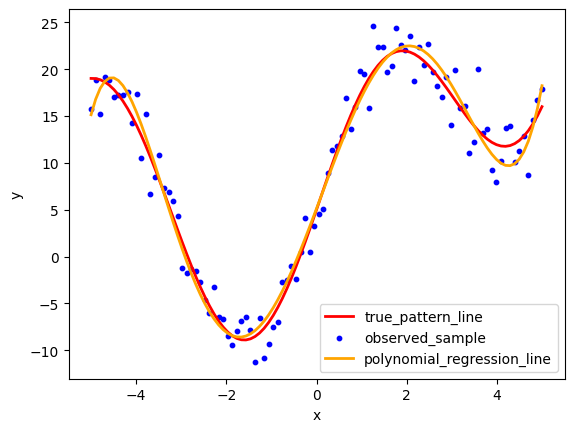

In [71]:
plt.plot(x,y_model,color='red',lw=2,label='true_pattern_line')
plt.scatter(x,y,color='blue',s=10,label='observed_sample')
plt.plot(x,y_predict,color='orange',lw=2,label='polynomial_regression_line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()